# Simple Linear Regression

## Objectives

*   Use statsmodel and scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model
*   Compare the models performance with different of predictors by using performance metrics and error scores.

### Libraries to be imported


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## Reading the data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Aylin1/Data-Science-Portfolio/47b37cbcb03136ae3c146803b62da2953f30b7e8/FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## ***1. Data Exploration***

Let's first have a descriptive exploration on our data.


In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
# Getting the Pearson Correlation Coefficients of reltionship with CO2EMISSIONS

df.corrwith(df['CO2EMISSIONS']).sort_values()

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
CO2EMISSIONS                1.000000
MODELYEAR                        NaN
dtype: float64

Co2 Emissions column is strongly and positively correlated with all the features above except FUELCONSUMPTION_COMB_MPG with which it is strongly and negatively correlated.


Let's select some features to explore more.


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244
5,3.5,6,10.0,11.9,7.7,230
6,3.5,6,10.1,11.8,8.1,232
7,3.7,6,11.1,12.8,9.0,255
8,3.7,6,11.6,13.4,9.5,267
9,2.4,4,9.2,10.6,7.5,212


Plot frequency distribution of each of these features:


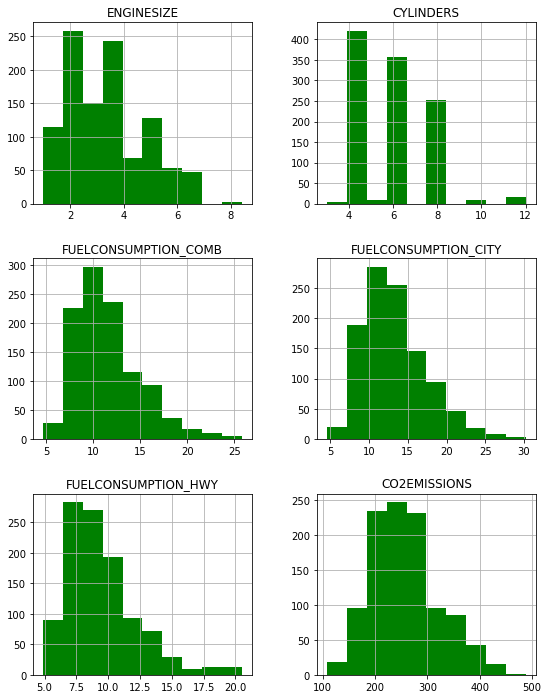

In [8]:
cdf.hist(figsize=(9,12), color='green')
plt.show()

## ***2. Creating train and test dataset***

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#Create training and test datasets
X = cdf.drop(["CO2EMISSIONS"], axis=1)
Y = cdf["CO2EMISSIONS"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

## ***3. Modeling using the OLS() function from the statsmodels library***

### Evaluation

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of the regression model.

It represents how close the data points are to the fitted regression line. 

The higher the R-squared value, the better the model fits your data. 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [11]:
import statsmodels.api as sm

# For calculating errors
from sklearn import metrics
from math import sqrt

In [12]:
def statsmodels_OLS(train_x, test_x, train_y, test_y):
    
    # Add a column for the constant
    train_x = sm.add_constant(train_x)

    # Fit the linear regression model using the training data
    model = sm.OLS(train_y, train_x).fit()

    # Add a column for the constant
    test_x= sm.add_constant(test_x)

    y_pred = model.predict(test_x)

    
    print("MSE: {}".format(metrics.mean_squared_error(test_y, y_pred)))
    print("RMSE: {}".format(sqrt(metrics.mean_squared_error(test_y, y_pred))))
    print("MAE: {}".format(metrics.mean_absolute_error(test_y, y_pred)))
    

    print("R-score: {}".format(1 - (model.ssr / model.centered_tss))) # -> R² computed with centering if the model contains a constant.
    
    # np version
    # print("MSE: {}".format(np.square(np.subtract(test_y,y_pred)).mean()))
    # print("RMSE: {}".format(np.sqrt(np.square(np.subtract(test_y,y_pred)).mean())))
    
    return model


In [13]:
model0 = statsmodels_OLS(X_train["FUELCONSUMPTION_COMB"], X_test["FUELCONSUMPTION_COMB"], Y_train, Y_test)

MSE: 828.8729584971902
RMSE: 28.790153846361957
MAE: 21.14859456023043
R-score: 0.7886571469306503


In [14]:
model1 = statsmodels_OLS(X_train["FUELCONSUMPTION_CITY"], X_test["FUELCONSUMPTION_CITY"], Y_train, Y_test)

MSE: 800.7703094639602
RMSE: 28.297885247204608
MAE: 20.299015972399282
R-score: 0.8004953173184048


In [15]:
model2 = statsmodels_OLS(X_train["FUELCONSUMPTION_HWY"], X_test["FUELCONSUMPTION_HWY"], Y_train, Y_test)

MSE: 1035.422584637238
RMSE: 32.177982917473834
MAE: 24.616507140658793
R-score: 0.7329701874627752


In [16]:
model3 = statsmodels_OLS(X_train["ENGINESIZE"], X_test["ENGINESIZE"], Y_train, Y_test)

MSE: 934.0663127815482
RMSE: 30.562498470863737
MAE: 22.835348536714452
R-score: 0.7541941664878573


In [17]:
model4 = statsmodels_OLS(X_train["CYLINDERS"], X_test["CYLINDERS"], Y_train, Y_test)

MSE: 1120.475689988885
RMSE: 33.47350728544718
MAE: 26.076092977581027
R-score: 0.7118700241779908


### We see that OLS function of statsmodel produces yields highest R2-score and lowest error scores when using FUELCONSUMPTION_CITY as predictor for Co2 emission, comparing to other features.

## ***4. Modeling using the Linear Regression function of sklearn***

**Coefficient** and **Intercept** in the simple linear regression are the parameters of the fit line.

Sklearn can estimate them directly from our data.

All of the data must be available to traverse and calculate the parameters.

### Plot outputs

We can plot the fit line over the data:

In [18]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [19]:
def LinearRegression_sklearn(train_x, test_x, train_y, test_y):

    regr = LinearRegression(fit_intercept=True)

    train_x = np.asanyarray(train_x).reshape(-1, 1)
    test_x = np.asanyarray(test_x).reshape(-1, 1)

    regr.fit(train_x, train_y)

    # Plot Regression Line
    plt.scatter(train_x, train_y,  color='blue')
    plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_, '-r')
    plt.xlabel("{}".format("Predictor"))
    plt.ylabel("{}".format("Target"))

    # Evaluate
    y_pred = regr.predict(test_x)

    print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
    print("Mean absolute error: %.2f (MAE)" % np.mean(np.absolute(y_pred - test_y)))
    print("R2-score: %.2f" % r2_score(test_y , y_pred))

    return regr



Residual sum of squares (MSE): 800.77
Mean absolute error: 20.30 (MAE)
R2-score: 0.82


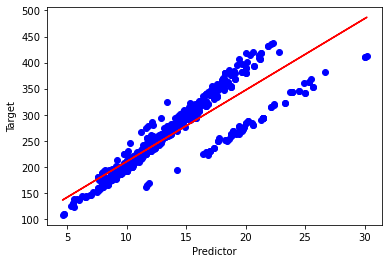

In [20]:
model12 = LinearRegression_sklearn(X_train.FUELCONSUMPTION_CITY, X_test.FUELCONSUMPTION_CITY, Y_train, Y_test)

Residual sum of squares (MSE): 828.87
Mean absolute error: 21.15 (MAE)
R2-score: 0.82


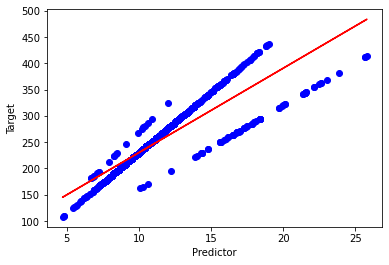

In [83]:
model22 = LinearRegression_sklearn(X_train.FUELCONSUMPTION_COMB, X_test.FUELCONSUMPTION_COMB, Y_train, Y_test)

We double checked the fact that using FUELCONSUMPTION_CITY for Linear Regression model yields higher R2-score and lowest error scores comparing to FUELCONSUMPTION_COMB

# ***CONCLUSION***

1. We looked at the correlation between independent variables and the dependent variable by calculating Pearson Coefficients.
2. We used statsmodels OLS function to estimate Simple Linear Regression by using a couple of features to predict CO2 Emission of cars.
3. We saw that FUELCONSUMPTION_CITY variable is best as predictor among other variables.
4. Also we double checked it by using Linear Regression model of sklearn, as a practice.
5. By Transforming FUELCONSUMPTION_CITY by Quantile Transformation, we got better R-score from the Linear Regression model.